In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('churn_data.csv')

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.columns.values

array(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user',
       'app_web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'], dtype=object)

In [5]:
dataset.shape

(27000, 31)

## Cleaning the Data , Removing the null values

In [6]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

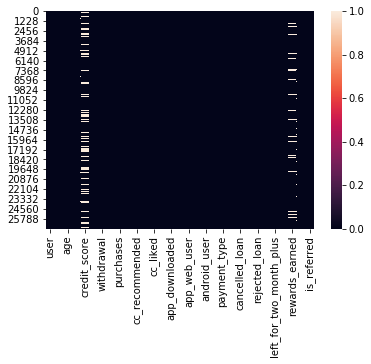

In [7]:
sns.heatmap(dataset.isna())

In [8]:
dataset=dataset[pd.notnull(dataset['age'])]
dataset=dataset.drop(columns=['rewards_earned','credit_score'])

In [9]:
dataset.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

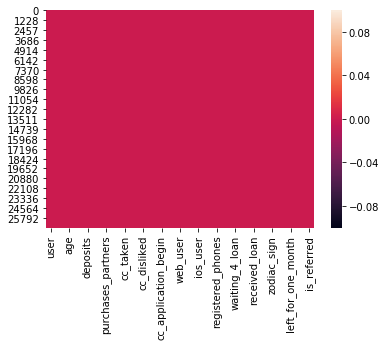

In [10]:
sns.heatmap(dataset.isna())

## Building Histogram for DataVisualization

In [11]:
dataset2=dataset.drop(columns=['user','churn'])

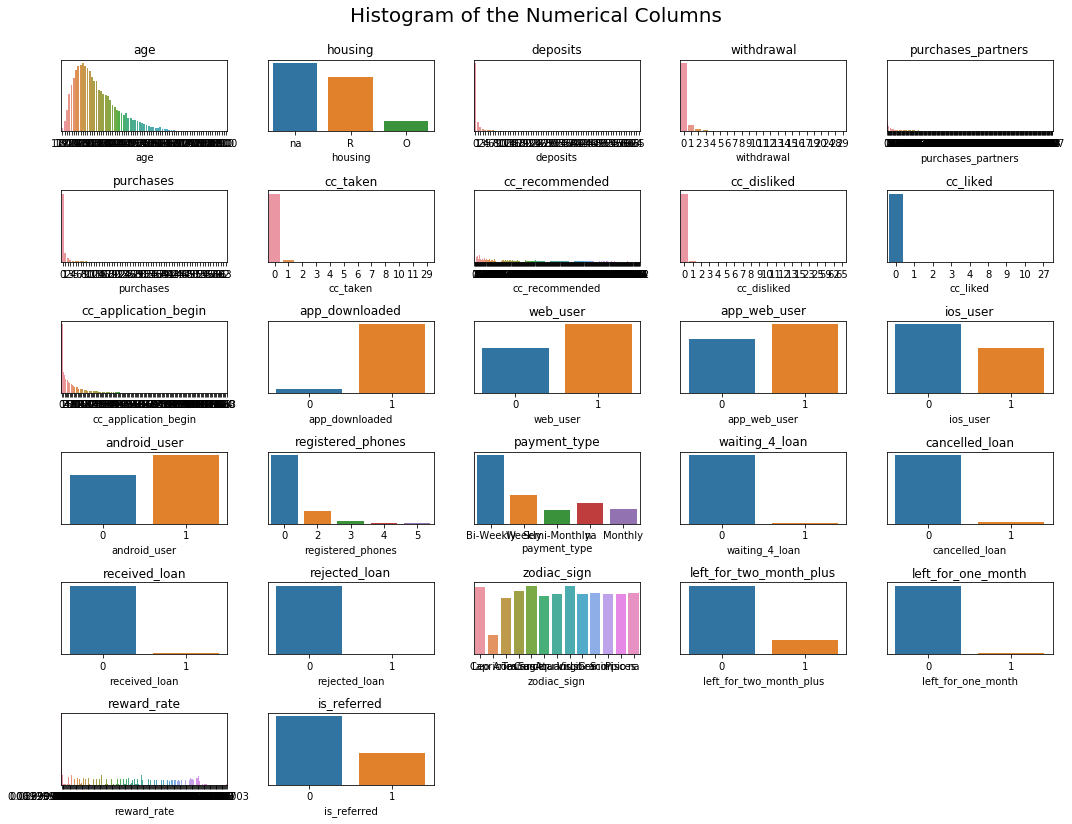

In [12]:
fig=plt.figure(figsize=(15,12))
plt.suptitle('Histogram of the Numerical Columns',fontsize=20)
for i in range(1,dataset2.shape[1]+1):
    plt.subplot(6,5,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    sns.countplot(dataset2.iloc[:,i-1])
    #vals=np.size(dataset2.iloc[:,i-1].unique())
    
    #sns.distplot(dataset2.iloc[:,i-1],bins=vals,color='#3F5D7D')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

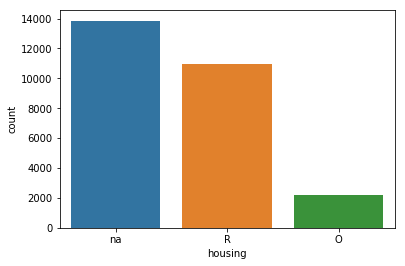

In [13]:
sns.countplot(dataset['housing'])

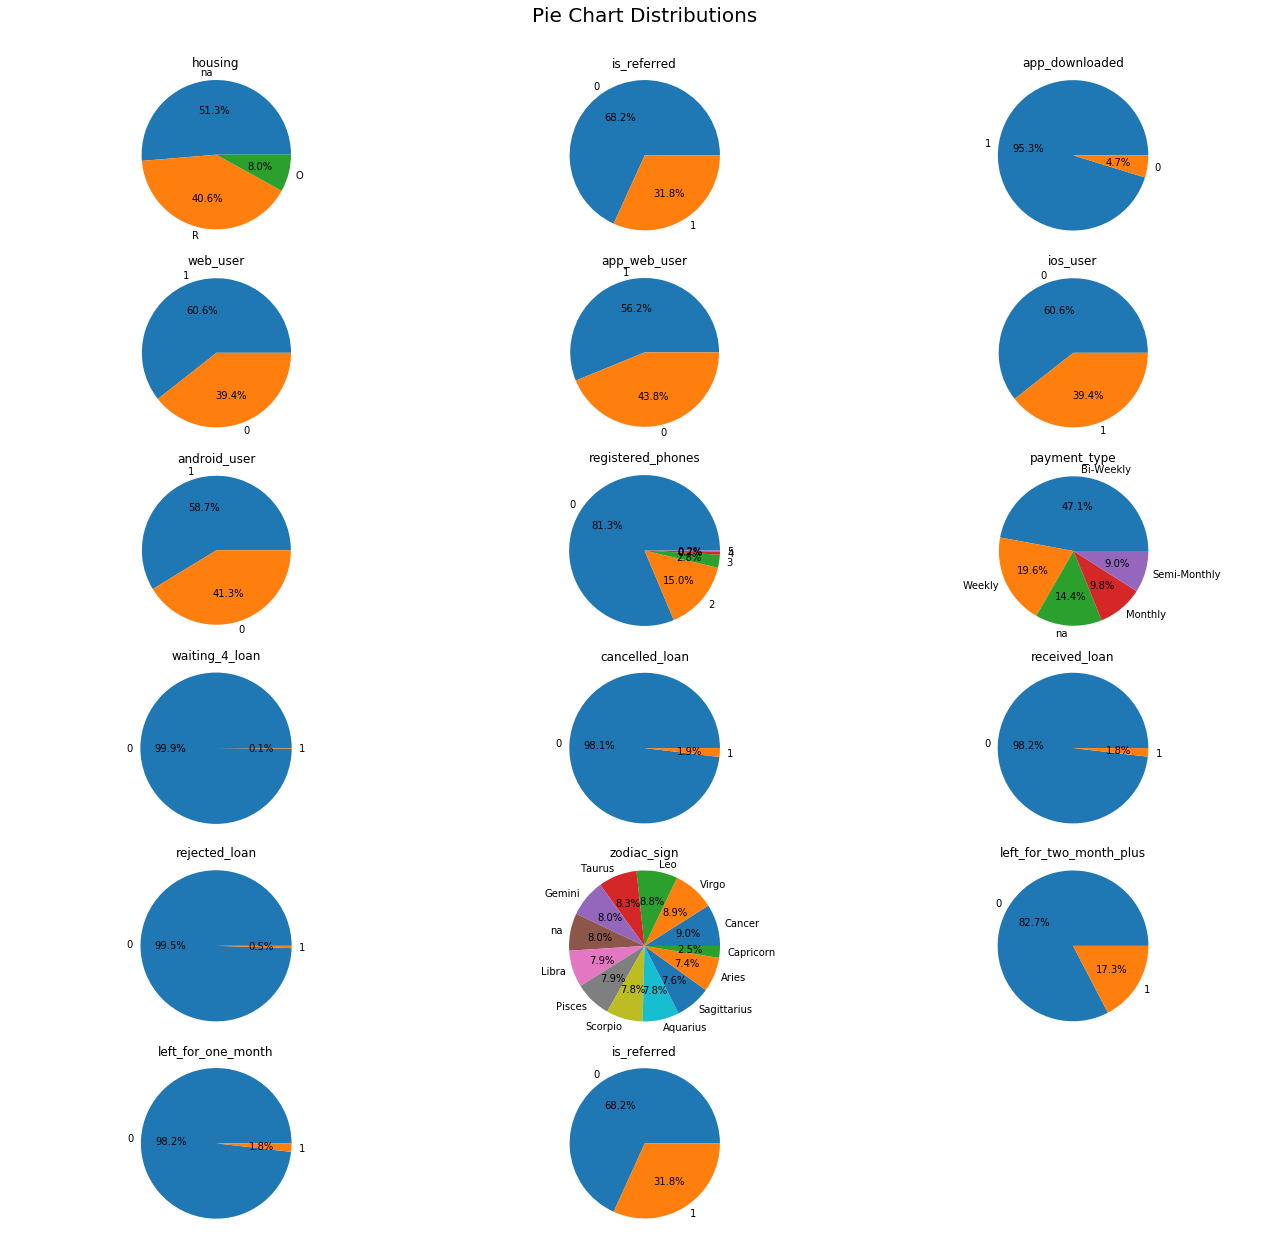

In [14]:
## Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(18, 18))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')#so that no X and Y axis is shown in the pieChart
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [15]:
dataset[dataset2.waiting_4_loan==1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [16]:
dataset[dataset2.cancelled_loan==1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [17]:
dataset[dataset2.received_loan==1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [18]:
dataset[dataset2.rejected_loan==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [19]:
dataset[dataset2.left_for_one_month==1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

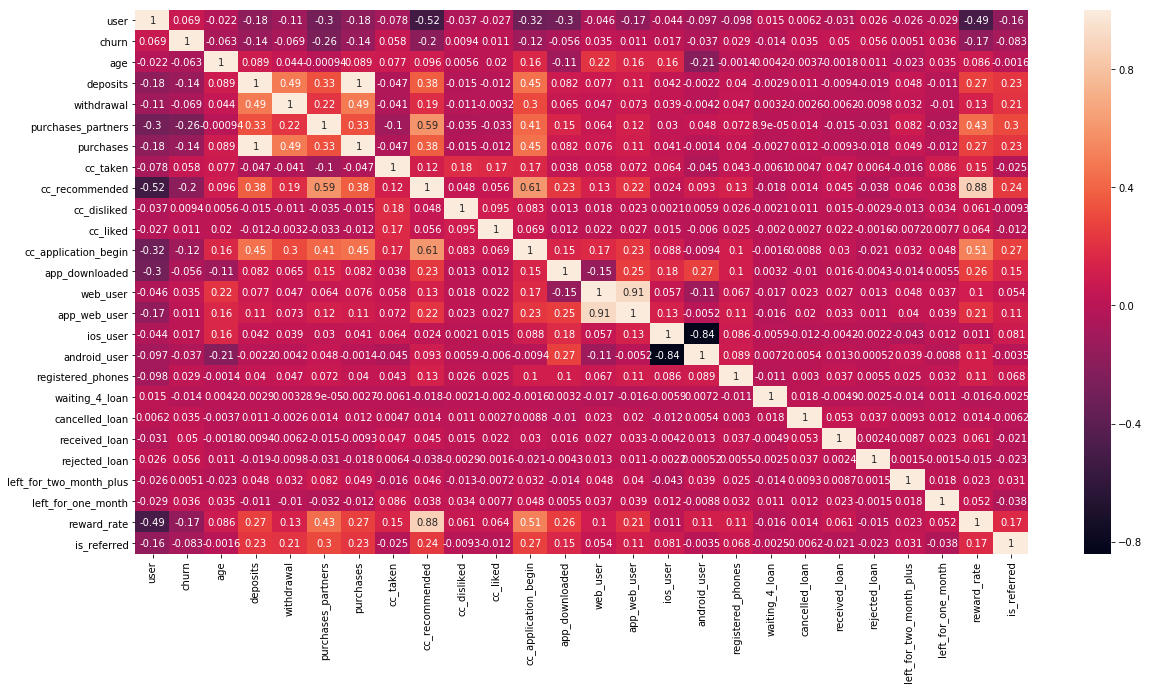

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True)

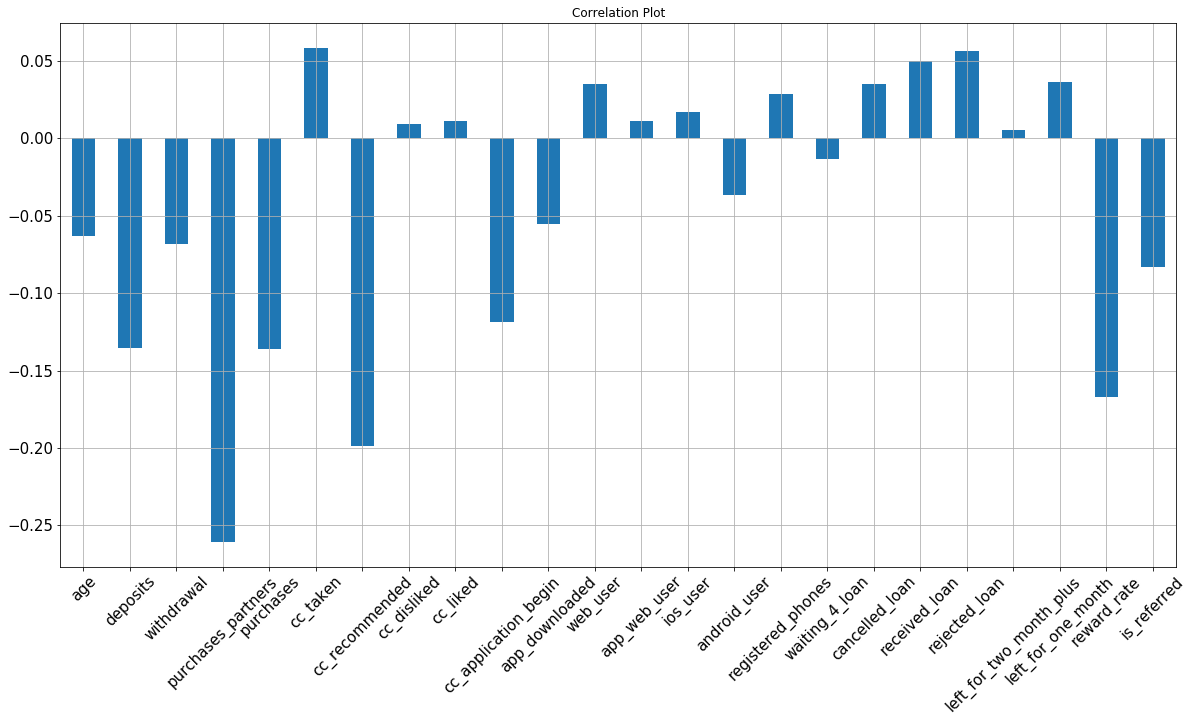

In [21]:
## Correlation Plot
dataset.drop(columns=['churn','user','housing','payment_type','zodiac_sign']).corrwith(dataset['churn']).plot.bar(figsize=(20,10),title='Correlation Plot',fontsize=15,rot=45,grid=True)

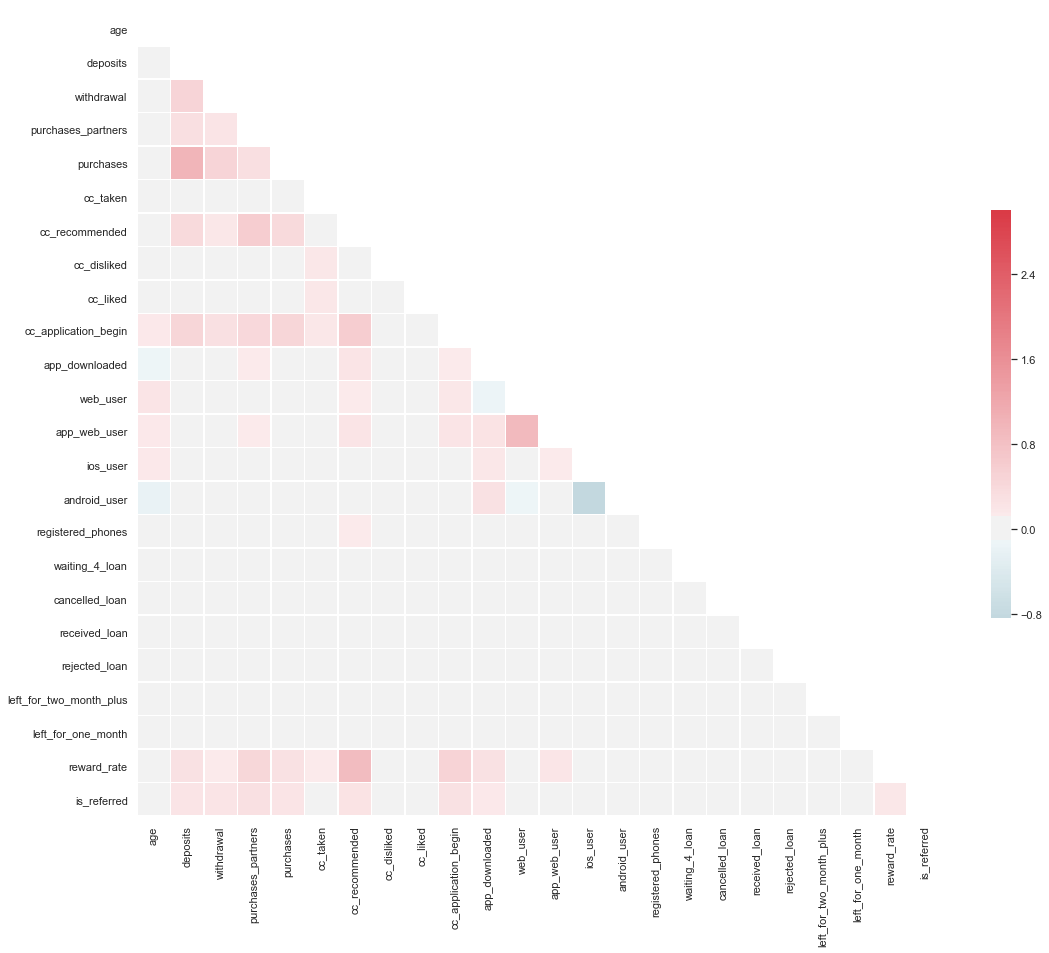

In [22]:
##Correlational Matrix
sns.set(style="white")

corr=dataset.drop(columns=['user','churn']).corr()

mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax=plt.subplots(figsize=(18,15))

cmap=sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=3,center=0,square=True,linewidths=0.5,cbar_kws={"shrink":.5})

In [23]:
data=pd.read_csv('new_churn_data.csv')

In [24]:
data.shape

(26996, 29)

In [25]:
data.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [27]:
user_identifier=data['user']
data=data.drop(columns=['user'])

In [29]:
data.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [30]:
data=pd.get_dummies(data)

In [31]:
data.shape

(26996, 46)

In [32]:
data.head()

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,0,37.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,28.0,0,0,1,0,0,96,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,35.0,47,2,86,47,0,285,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,26.0,26,3,38,25,0,74,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,27.0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data.columns.values

array(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked',
       'cc_liked', 'cc_application_begin', 'app_downloaded', 'web_user',
       'app_web_user', 'ios_user', 'android_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'is_referred', 'housing_O', 'housing_R',
       'housing_na', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'payment_type_na', 'zodiac_sign_Aquarius', 'zodiac_sign_Aries',
       'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo',
       'zodiac_sign_na'], dtype=object)

In [35]:
data=data.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

## Model Tarining
Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['churn']), data['churn'], test_size=0.2, random_state=0)

In [38]:
## Balancing the dataset to inhance the accuracy of the model
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [47]:
pos_index=y_train[y_train.values==1].index
neg_index=y_train[y_train.values==0].index

In [48]:
if len(pos_index)>len(neg_index):
    higher=pos_index
    lower=neg_index
else:
    lower=pos_index
    higher=neg_index      

In [51]:
import random
random.seed(0)
higher=np.random.choice(higher,size=len(lower))
lower=np.asarray(lower)
new_indexes=np.concatenate((lower,higher))
X_train=X_train.loc[new_indexes,]
y_train=y_train[new_indexes]

In [52]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train2=pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.transform(X_test))
X_train2.columns=X_train.columns.values
X_test2.columns=X_test.columns.values
X_train2.index=X_train.index.values
X_test2.index=X_test.index.values
X_train=X_train2
X_test=X_test2

C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\alokt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [55]:
## Model Fitting
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
y_pred=classifier.predict(X_test)

In [57]:
y_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score

In [65]:
cm=confusion_matrix(y_test,y_pred)

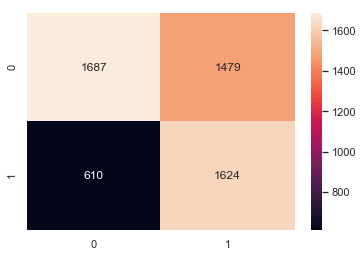

In [66]:
sns.heatmap(cm,annot=True,fmt='g')

In [67]:
accuracy_score(y_test,y_pred)

0.6131481481481481

In [68]:
f1_score(y_test,y_pred)

0.6085816001498968

In [69]:
precision_score(y_test,y_pred)

0.5233644859813084

In [70]:
recall_score(y_test,y_pred)

0.7269471799462847

In [91]:
## K Cross Validation
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=classifier,
                    X=X_train,
                    y=y_train,
                    cv=10)
print("Accuracy_percentage :%0.3f Error :(+/- %0.3f)"%(acc.mean()*100,acc.std()))

C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy_percentage :64.284 Error :(+/- 0.012)


In [92]:
final_results=pd.concat([y_test,user_identifier],axis=1).dropna()

In [93]:
final_results['predicted_result']=y_pred
final_results[['user','churn','predicted_result']].reset_index(drop=True)

,user,churn,predicted_result
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,1
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0


In [94]:
## Feature Selection (Which features are usefull for the predictions and which are not)

In [95]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
rfe=RFE(classifier,20)
rfe=rfe.fit(X_train,y_train)
print(rfe.support_)

C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[ True  True  True  True  True  True  True  True False  True  True False
  True  True False  True False  True  True  True False False  True False
 False False  True False False False  True False False  True False False
 False False False False False False]


In [97]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_application_begin',
       'app_downloaded', 'app_web_user', 'ios_user', 'registered_phones',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'reward_rate',
       'payment_type_Bi-Weekly', 'zodiac_sign_Aquarius',
       'zodiac_sign_Capricorn'],
      dtype='object')

In [98]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train[X_train.columns[rfe.support_]],y_train)

C:\Users\alokt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
y_pred=classifier.predict(X_test[X_train.columns[rfe.support_]])

In [100]:
cm=confusion_matrix(y_test,y_pred)

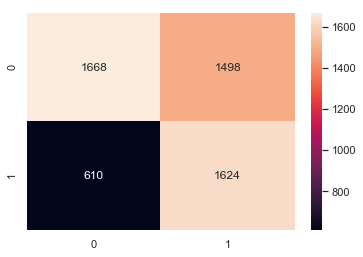

In [101]:
sns.heatmap(cm,annot=True,fmt='g')

In [102]:
accuracy_score(y_test,y_pred)

0.6096296296296296